# Machine Learning Modeling Tests

This notebook contains tests of a library to run multiple models concurrently on a single dataset and report per-fold accuracy, out-of-sample predictions, and feature importance

In [2]:
%matplotlib inline
from ml import datasets
from ml.model import models
from ml.model import importances
import imp
imp.reload(models)
imp.reload(importances)
imp.reload(datasets)

<module 'ml.datasets' from '/Users/eczech/repos/portfolio/functional/ml/python/ml/datasets.py'>

# Binary Classifiers
Tests for classifiers with only 2 outcomes

In [3]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

clfs = {
    'gbr': GradientBoostingClassifier(n_estimators=1),
    'grid_gbr': GridSearchCV(GradientBoostingClassifier(), {'n_estimators': [10, 25, 50, 100]}),
    'rf': RandomForestClassifier(),
    'lr': LogisticRegression(),
    'lrcv': LogisticRegressionCV(),
    'svc': SVC(probability=True, kernel='linear')
}

X, y = datasets.get_test_classifier_data(multinomial=False)
res = models.run_classifiers(X, y, clfs, StratifiedKFold(y, 3), 
                             keep_X=True, predict_proba=True, par_n_jobs=3)

[INFO/PoolWorker-1] child process calling self.run()
[INFO/PoolWorker-2] child process calling self.run()
[INFO/PoolWorker-3] child process calling self.run()
[INFO/PoolWorker-1] {'n_estimators': 25}
[INFO/PoolWorker-2] {'n_estimators': 10}
[INFO/PoolWorker-3] {'n_estimators': 10}


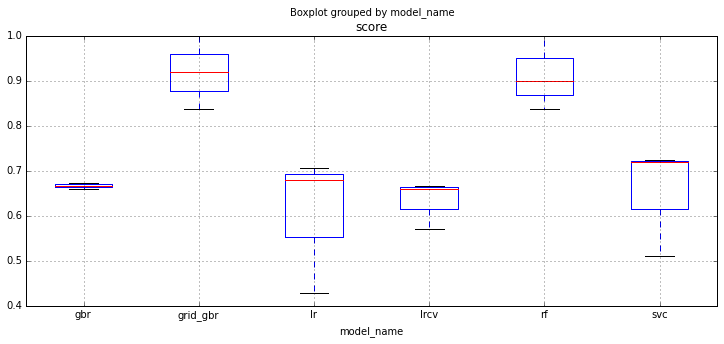

In [4]:
from sklearn.metrics import accuracy_score
score_func = lambda clf, y_true, y_pred: accuracy_score(y_true, y_pred)

x = models.summarize_scores(res, score_func, use_proba=False)
x.boxplot('score', 'model_name', figsize=(12,5))

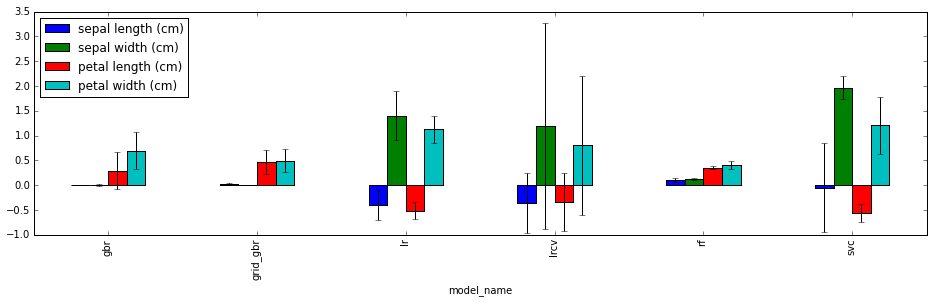

In [5]:
x = models.summarize_importances(res)
x = x.drop('fold_id', axis=1).groupby('model_name')
x.agg(np.mean).plot(yerr=x.agg(np.std), kind='bar', figsize=(16,4))

In [6]:
x = models.summarize_predictions(res)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),fold:y_pred,fold:y_true,fold:y_proba_0,fold:y_proba_1,fold:model_name,fold:fold_id
0,5.1,3.5,1.4,0.2,1,1,0,1,rf,1
1,4.9,3.0,1.4,0.2,1,1,0,1,rf,1
2,4.7,3.2,1.3,0.2,1,1,0,1,rf,1
3,4.6,3.1,1.5,0.2,1,1,0,1,rf,1
4,5.0,3.6,1.4,0.2,1,1,0,1,rf,1


# Regressors

Regressor Tests

In [12]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV, RidgeCV, Ridge, LinearRegression
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR

clfs = {
    'gbr': GradientBoostingRegressor(n_estimators=1),
    'grid_gbr': GridSearchCV(GradientBoostingRegressor(), {'n_estimators': [10, 25, 50, 100]}),
    'rf': RandomForestRegressor(),
    'enet': ElasticNet(),
    'enetcv': ElasticNetCV(cv=5),
    'ridge': Ridge(),
    'ridgecv': RidgeCV(cv=5),
    'svr': SVR(kernel='linear'),
    'lr': LinearRegression()
}

X, y = datasets.get_test_regressor_data()
y = y.astype(np.object)
res = models.run_regressors(X, y, clfs, KFold(len(y), 10), 
                             keep_X=True, par_n_jobs=3)

[INFO/PoolWorker-7] child process calling self.run()
[INFO/PoolWorker-8] child process calling self.run()
[INFO/PoolWorker-9] child process calling self.run()
[INFO/PoolWorker-7] {'n_estimators': 100}
[INFO/PoolWorker-8] {'n_estimators': 50}
[INFO/PoolWorker-9] {'n_estimators': 100}
[INFO/PoolWorker-7] {'n_estimators': 50}
[INFO/PoolWorker-8] {'n_estimators': 100}
[INFO/PoolWorker-9] {'n_estimators': 100}
[INFO/PoolWorker-7] {'n_estimators': 100}
[INFO/PoolWorker-8] {'n_estimators': 50}
[INFO/PoolWorker-9] {'n_estimators': 100}
[INFO/PoolWorker-9] {'n_estimators': 100}


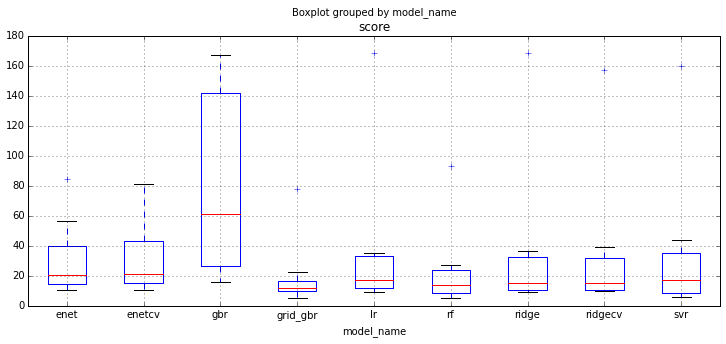

In [18]:
from sklearn.metrics import mean_squared_error
score_func = lambda clf, y_true, y_pred: mean_squared_error(y_true, y_pred)

x = models.summarize_scores(res, score_func, use_proba=False)
x.boxplot('score', 'model_name', figsize=(12,5))

In [16]:
def get_model(res, name):
    for i in res:
        for j in i:
            if (j['model']['name'] == name):
                return j['model']['value']

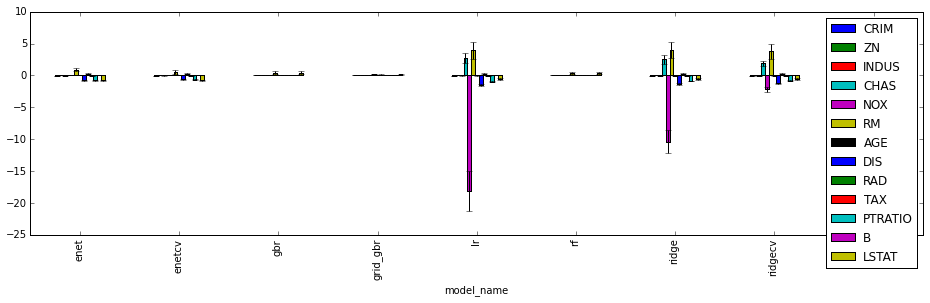

In [17]:
x = models.summarize_importances(res)
x = x.drop('fold_id', axis=1).groupby('model_name')
x.agg(np.mean).plot(yerr=x.agg(np.std), kind='bar', figsize=(16,4))